[View in Colaboratory](https://colab.research.google.com/github/ayush3899/Neural_Network-/blob/master/Mnistfashiondataset.ipynb)

In [0]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

1.12.0-rc1


In [0]:
fdata=keras.datasets.fashion_mnist


In [6]:
(train_images,train_labels),(test_images,test_labels)=fdata.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [10]:
train_labels 
#each label is an integrer between 0 and 9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

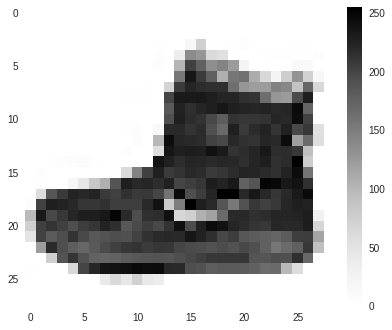

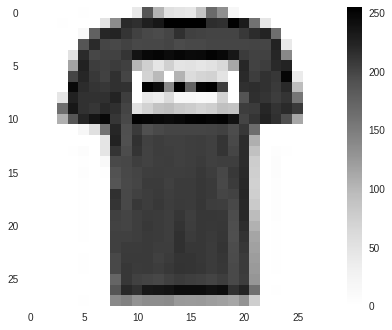

In [17]:
#data processing
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
#data processing
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

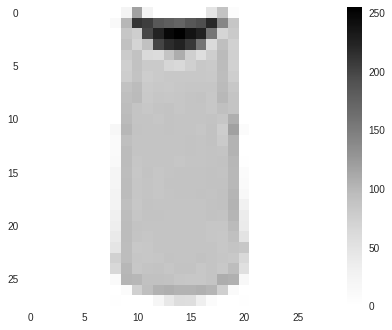

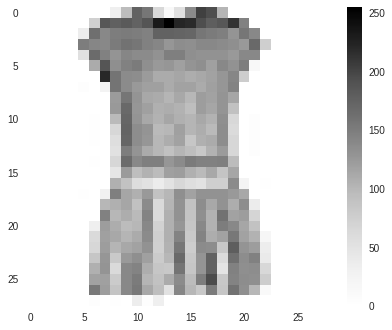

In [20]:
#data processing
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
#data processing
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

In [0]:
#now scale these values of 0 to 1 before feeding to the neural network so juat 
# devide it byb 255
train_images=train_images/255.0
test_images=test_images/255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

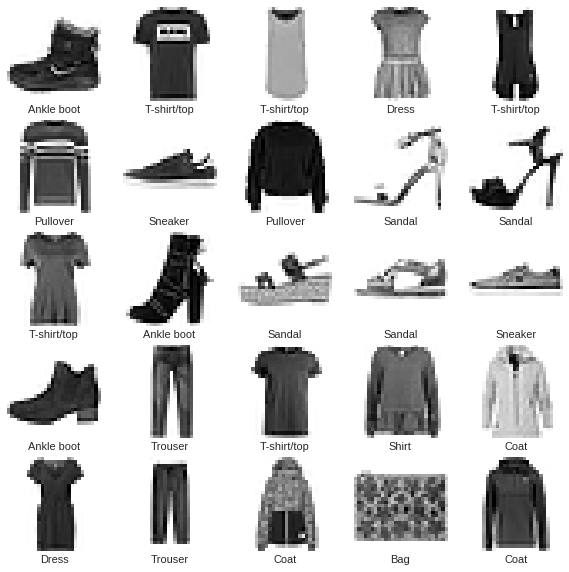

In [66]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
#flatten for flatting the pixels means 2-d array---> 1-d array 
#28*28=784
#Dense for 128 node and last one is softmax layer

In [0]:
#before the model is ready for training it needs a few more setting
#loss function :  how accurate the model is during the trianing 
#optimizer:: this is how the model i supdated beased on hte data it sees 
#nd it loss function
#metrics -- used to moniter thetraining and testing steps


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
#now training the model 
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.4705 - acc: 0.8329
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.4554 - acc: 0.8393
Epoch 3/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.4438 - acc: 0.8434
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.4339 - acc: 0.8477
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.4258 - acc: 0.8498


In [56]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("Test accuracy:",test_acc)
print("Loss test::",test_loss)

10000/10000 [==============================] - 0s 30us/step
Test accuracy: 0.8338
Loss test:: 0.4562504081726074


In [0]:
#this turns oyut that the accurcy on the dataset is a littel less than the accuracy
# on the training datset.this gap between training accuarcy and test 
# accuracy and tets acccuracy is nan example of overfitting,it when aml 
# performs worse on new data than on thier training data 

In [0]:
#mkae predictions

In [0]:
pred=model.predict(test_images)

In [77]:
pred[0]

array([5.4722108e-07, 3.6289599e-08, 6.7102037e-06, 3.4292211e-06,
       9.1806951e-06, 1.0699089e-01, 1.3347265e-05, 2.0858610e-01,
       3.8561472e-03, 6.8053365e-01], dtype=float32)

In [0]:
# a prediction is array of 10numbers these descibe the confidence of th model
# that image corresponds to esch og the 10 diff articles of clotinh.
#we can see the lavel has the highest confidence value


In [68]:
np.argmax(pred[0])

9

In [69]:
# so the model confidence that this image is an ankle boot clas_names[9]
# and we check the test label and we can check
test_labels[0]

9

In [0]:
# we can graph this to look at the full set of 10 cannels

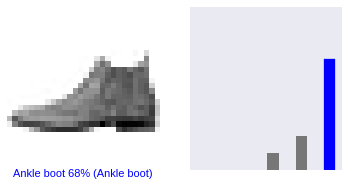

In [71]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
  
  
  

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)  

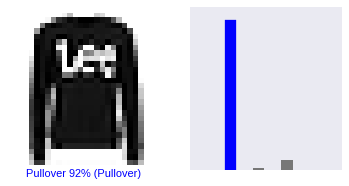

In [74]:
i=1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,pred,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,pred,test_labels)

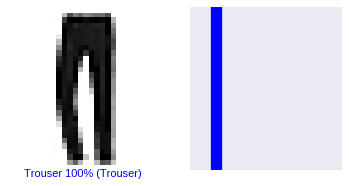

In [75]:
i=2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,pred,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,pred,test_labels)

In [78]:
pred[2]

array([4.4199161e-05, 9.9979037e-01, 6.3376742e-06, 8.6899323e-05,
       7.1765724e-05, 1.5487975e-12, 4.5928263e-07, 2.6422871e-09,
       1.3184123e-08, 1.5692572e-10], dtype=float32)

In [79]:
np.argmax(pred[2])

1

In [80]:
test_labels[2]

1

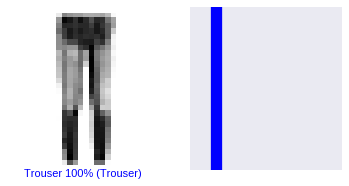

In [81]:
i=3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,pred,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,pred,test_labels)

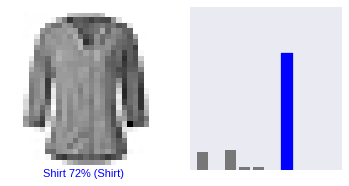

In [82]:
i=4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,pred,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,pred,test_labels)

In [0]:
#  let's plot several images with their predictions.correct
#   predictions are blue and incorrect pred labesla re red. the number 
#   givs the precent out of  for the predited label 

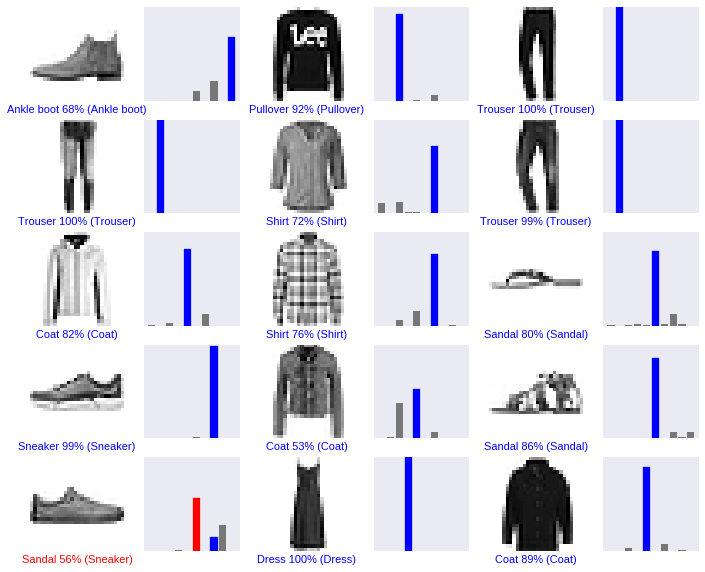

In [84]:
nr=5
nc=3
nimages=nr*nc
plt.figure(figsize=(2*2*nc,2*nr))

for i in range(nimages):
  plt.subplot(nr,2*nc,2*i+1)
  plot_image(i,pred,test_labels,test_images)
  plt.subplot(nr,2*nc,2*i+2)
  plot_value_array(i,pred,test_labels)
  

In [85]:
# Finally, use the trained model to make a prediction about a single image.
img=test_images[0]
print(img.shape)


(28, 28)


In [86]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [87]:
preds=model.predict(img)
print(preds)

[[0.03434163 0.0032856  0.01755994 0.03594424 0.00483814 0.82783383
  0.04458979 0.02051435 0.00912024 0.00197228]]


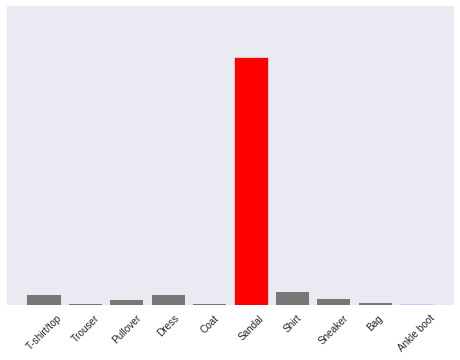

In [94]:
plot_value_array(0, preds, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [95]:
np.argmax(preds[0])

5